### Datasets & Source

In [1]:
import pandas as pd
import numpy as np

# If True then use local datasets with latest record date 2022-3-11
# If False then read from the updated source
TEST = True


Datasets are from one of the most trusted and well-maintained public repositories:
- Johns Hopkins Univeristy Center for Systems Science and Engineering Dataset for Covid-19 (Hereinafter referred as CSSEGIS dataset). GitHub link: https://github.com/CSSEGISandData/COVID-19.
> Ensheng Dong, Hongru Du, Lauren Gardner. 2020. ``An interactive web-based dashboard to track COVID-19 in real time". The Lancet Infectious Diseases Correpsondence, volume 20, issue 5, p533-534. DOI:10.1016/S1473-3099(20)30120-1.

which is updated in a daily basis.

More precisely, we will use three two series global confirmed and global death cases.

In [2]:
# Confirmed cases dataframe
confirmed_df = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv' if not TEST else 'Test_Data/time_series_covid19_confirmed_global.csv'
    )
confirmed_df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,174073,174214,174214,174331,174582,175000,175353,175525,175893,175974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,271825,271825,272030,272030,272210,272250,272337,272412,272479,272552
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265079,265130,265186,265227,265265,265297,265323,265346,265366,265391
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38249,38342,38434,38434,38434,38620,38710,38794,38794,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98746,98746,98796,98796,98806,98806,98829,98855,98855,98855


In [3]:
# Death cases dataframe
deaths_df = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv' if not TEST else 'Test_Data/time_series_covid19_deaths_global.csv'
    )
deaths_df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7617,7619,7619,7622,7623,7626,7630,7636,7639,7640
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3474,3474,3478,3478,3482,3483,3483,3483,3484,3485
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6843,6848,6852,6853,6855,6857,6858,6860,6861,6861
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,151,151,151,151,151,151,152,152,152,152
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


And one time series for vaccination count.

In [4]:
vaccines_df = pd.read_csv(
    'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv' if not TEST else 'Test_Data/time_series_covid19_vaccine_doses_admin_global.csv'
    ).drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population']).rename(columns={'Long_': 'Long', 'Province_State': 'Province/State', 'Country_Region': 'Country/Region'})
vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,...,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14
0,NaN,Afghanistan,33.9391,67.7100,NaN,NaN,NaN,NaN,NaN,NaN,...,5535254.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0,5597130.0
1,NaN,Albania,41.1533,20.1683,NaN,NaN,NaN,NaN,NaN,NaN,...,2708574.0,2708574.0,2708574.0,2708574.0,2723146.0,2723146.0,2729969.0,2729969.0,2729969.0,2729969.0
2,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,NaN,NaN,NaN,NaN,NaN,NaN,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


### Preparation & Preprocessing


In [5]:
import datetime


Since vaccination is only available after about one year from the outbreak, we are going to explore on the recent one year data, from 2021-3-1 to 2022-2-28. Some Alignments are required because of different record formats:
- Generate desired columns/rows to keep.

In [6]:
start_date, end_date = datetime.date(2021, 3, 1), datetime.date(2022, 3, 1)
CSSEGIS_col = ['Province/State', 'Country/Region', 'Lat', 'Long', 'Population']
dates_format_1, dates_format_2 = [], []

# Single date generator
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

for single_date in daterange(start_date, end_date):
    dates_format_1.append(single_date.strftime('%#m/%#d/%y'))
    dates_format_2.append(single_date.strftime('%Y-%m-%d'))

dates_format_1[:5], dates_format_2[:5]


(['3/1/21', '3/2/21', '3/3/21', '3/4/21', '3/5/21'],
 ['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05'])

- Keep only data within the range of interest for the two sources respectively.

In [7]:
oneyear_confirmed_df = confirmed_df[confirmed_df.columns.intersection([*CSSEGIS_col, *dates_format_1])]
oneyear_deaths_df = deaths_df[deaths_df.columns.intersection([*CSSEGIS_col, *dates_format_1])]

# oneyear_confirmed_df.head(5)
oneyear_deaths_df.head(5)


,Province/State,Country/Region,Lat,Long,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.93911,67.709953,2444,2446,2446,2446,2449,2449,...,7534,7539,7549,7569,7574,7578,7579,7585,7593,7598
1,NaN,Albania,41.15330,20.168300,1816,1835,1856,1876,1897,1918,...,3433,3438,3445,3451,3453,3457,3458,3458,3464,3469
2,NaN,Algeria,28.03390,1.659600,2987,2991,2996,3002,3007,3010,...,6787,6797,6805,6812,6816,6820,6823,6828,6831,6835
3,NaN,Andorra,42.50630,1.521800,110,110,112,112,112,112,...,150,150,150,151,151,151,151,151,151,151
4,NaN,Angola,-11.20270,17.873900,508,510,510,511,511,512,...,1899,1899,1899,1899,1899,1899,1899,1899,1899,1900


In [8]:
oneyear_vaccines_df = vaccines_df[vaccines_df.columns.intersection([*CSSEGIS_col,*dates_format_2])]

oneyear_vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,...,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28
0,NaN,Afghanistan,33.9391,67.7100,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,NaN,Albania,41.1533,20.1683,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,NaN,Algeria,28.0339,1.6596,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Align them with respect to Unique Country/Region and unify date format

In [9]:
country_region = set(oneyear_confirmed_df['Country/Region']).intersection(set(oneyear_vaccines_df['Country/Region']))

aligned_oneyear_confirmed_df = oneyear_confirmed_df.loc[oneyear_confirmed_df['Country/Region'].isin(country_region)]
aligned_oneyear_deaths_df = oneyear_deaths_df.loc[oneyear_deaths_df['Country/Region'].isin(country_region)]

aligned_oneyear_vaccines_df = oneyear_vaccines_df.loc[oneyear_vaccines_df['Country/Region'].isin(country_region)]
aligned_oneyear_vaccines_df.rename(columns={d2:d1 for d1, d2 in zip(dates_format_1, dates_format_2)}, inplace=True)

assert(set(aligned_oneyear_confirmed_df['Country/Region']) == set(aligned_oneyear_vaccines_df['Country/Region']))

# aligned_oneyear_confirmed_df
# aligned_oneyear_deaths_df
aligned_oneyear_vaccines_df.head(5)


,Province/State,Country/Region,Lat,Long,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,NaN,Afghanistan,33.9391,67.7100,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,NaN,Albania,41.1533,20.1683,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,NaN,Algeria,28.0339,1.6596,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,NaN,Andorra,42.5063,1.5218,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Build the dataframe for the aggregation of subregions/provinces/statates for a region/country.

In [10]:
aligned_aggregated_confirmed_df = aligned_oneyear_confirmed_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)
aligned_aggregated_deaths_df = aligned_oneyear_deaths_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)
aligned_aggregated_vaccines_df = aligned_oneyear_vaccines_df[['Country/Region', *dates_format_1]].groupby('Country/Region', as_index=False).agg(func=sum)

# aligned_aggregated_confirmed_df.head(5)
# aligned_aggregated_deaths_df.head(5)
aligned_aggregated_vaccines_df.head(5)

,Country/Region,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,...,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22
0,Afghanistan,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,8200.0,...,5321308.0,5321308.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5412309.0,5535254.0,5535254.0
1,Albania,14295.0,14295.0,15793.0,15793.0,15793.0,15793.0,15793.0,15793.0,15793.0,...,2673183.0,2673183.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2686398.0,2707658.0,2707658.0
2,Algeria,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,75000.0,...,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0,13461201.0
3,Andorra,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,2526.0,3611.0,3611.0,...,140193.0,140193.0,141962.0,141962.0,141962.0,141962.0,141962.0,141962.0,142420.0,142420.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6169.0,6169.0,...,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0,15505389.0


- Build the dataframe for the global counts for these datasets in addition to the country/region based count

In [11]:
aligned_oneyear_global_confirmed_df = pd.DataFrame(
    aligned_oneyear_confirmed_df[dates_format_1].sum(axis=0), 
    columns=['Daily_Global_Confirmed']
    )
aligned_oneyear_global_deaths_df = pd.DataFrame(
    aligned_oneyear_deaths_df[dates_format_1].sum(axis=0),
    columns=['Daily_Global_Deaths']
    )
aligned_oneyear_global_vaccines_df = pd.DataFrame(
    aligned_oneyear_vaccines_df[dates_format_1].sum(axis=0),
    columns=['Daily_Global_Vaccinations']
    )

# aligned_oneyear_global_confirmed_df
# aligned_oneyear_global_deaths_df 
aligned_oneyear_global_vaccines_df.head(5)


,Daily_Global_Vaccinations
3/1/21,262816442.0
3/2/21,268933995.0
3/3/21,276039548.0
3/4/21,284250492.0
3/5/21,291988658.0


### Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

- Global series:

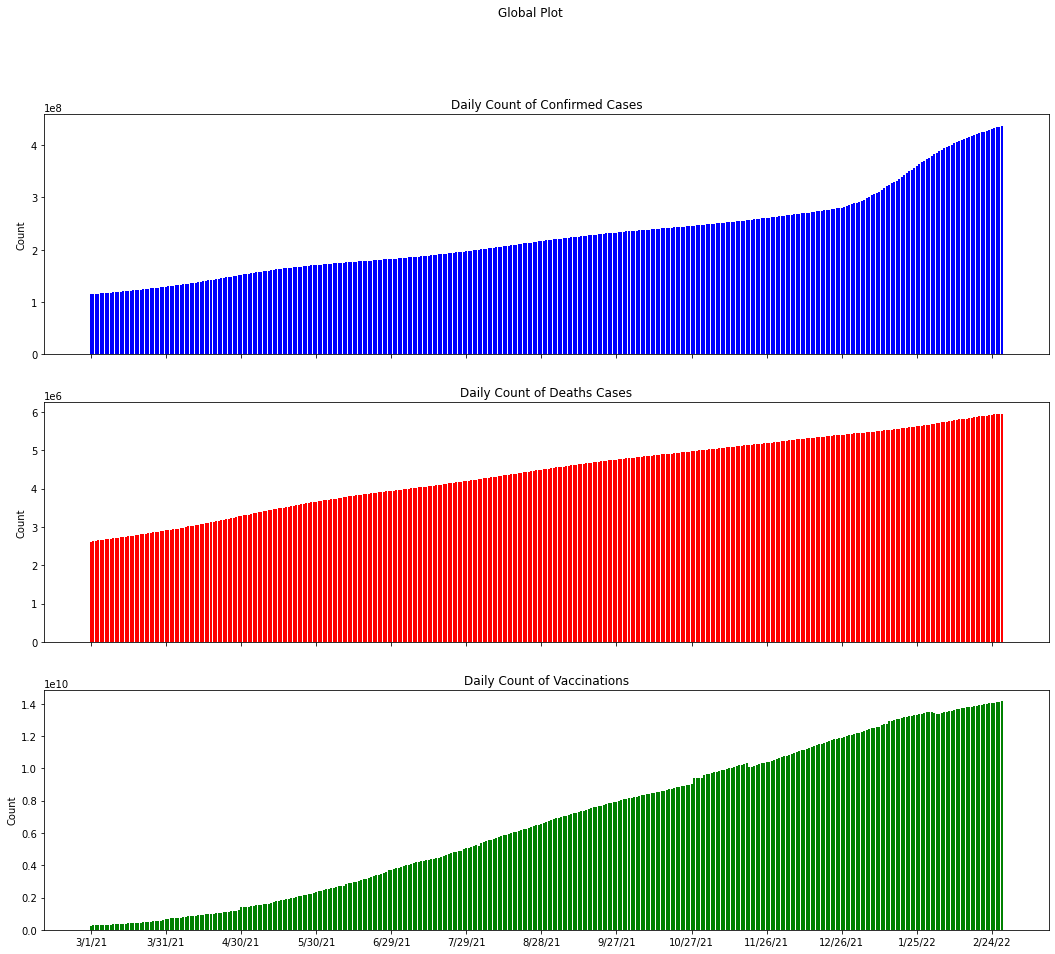

In [13]:
fig_1, axs_1 = plt.subplots(3, figsize=(18,15), sharex=True)
fig_1.suptitle('Global Plot')

plt.xticks(ticks=range(0, len(dates_format_1), 30), labels=dates_format_1[::30])

axs_1[0].bar(dates_format_1, aligned_oneyear_global_confirmed_df['Daily_Global_Confirmed'], color='blue')
axs_1[0].set_title('Daily Count of Confirmed Cases')
axs_1[0].set_ylabel('Count')

axs_1[1].bar(dates_format_1, aligned_oneyear_global_deaths_df['Daily_Global_Deaths'], color='red')
axs_1[1].set_title('Daily Count of Deaths Cases')
axs_1[1].set_ylabel('Count')

axs_1[2].bar(dates_format_1, aligned_oneyear_global_vaccines_df['Daily_Global_Vaccinations'], color='green')
axs_1[2].set_title('Daily Count of Vaccinations')
axs_1[2].set_ylabel('Count')

plt.show()

- Regional series:

In [14]:
from ipywidgets import interact

%matplotlib widget

country_list = aligned_aggregated_confirmed_df['Country/Region'].tolist()
country_dict = {n: i for i, n in list(enumerate(country_list))}

@interact(Country_Name=country_list)
def plot_by_region(Country_Name):

    fig_2, axs_2 = plt.subplots(1, 3, figsize=(12, 4))
    fig_2.suptitle(f'Regional Count: {Country_Name}')

    axs_2[0].plot(aligned_aggregated_confirmed_df.iloc[country_dict[Country_Name]][1:], color='blue')
    axs_2[0].set_title('Confirmed')
    axs_2[0].set_ylabel('Count')
    axs_2[0].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    axs_2[1].plot(aligned_aggregated_deaths_df.iloc[country_dict[Country_Name]][1:], color='red')
    axs_2[1].set_title('Deaths')
    axs_2[1].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    axs_2[2].plot(aligned_aggregated_vaccines_df.iloc[country_dict[Country_Name]][1:], color='green')
    axs_2[2].set_title('Vaccinations')
    axs_2[2].set_xticks(ticks=range(0, len(dates_format_1), 90), labels=dates_format_1[::90])

    plt.show()


interactive(children=(Dropdown(description='Country_Name', options=('Afghanistan', 'Albania', 'Algeria', 'Ando…

In [15]:
%matplotlib inline

### Baseline

- Simple feature engineering.

In [16]:
baseline_global_confirmed_df = aligned_oneyear_global_confirmed_df.copy()
baseline_global_confirmed_df['Day_From_Start'] = list(range(len(dates_format_1)))

baseline_global_confirmed_df.head(5)


,Daily_Global_Confirmed,Day_From_Start
3/1/21,114872329,0
3/2/21,115188426,1
3/3/21,115632421,2
3/4/21,116090689,3
3/5/21,116539723,4


- Simple Regression Model using Support Vector Regression.
> Cortes, C., Vapnik, V. ``Support-vector networks". Mach Learn 20, 273–297 (1995). doi:10.1007/BF00994018.

> Vapnik, V.N., Golowich, S.E., & Smola, A. (1996). ``Support Vector Method for Function Approximation, Regression Estimation and Signal Processing". NIPS 1996. doi:10.5555/2998981.2999021.

- Train on 300 days, predict the next 64 days.

In [17]:
from sklearn import svm

x = baseline_global_confirmed_df['Day_From_Start'].values.reshape(-1, 1)
y = baseline_global_confirmed_df['Daily_Global_Confirmed'].values

split = 300
x_train, y_train, x_test, y_test = x[:split], y[:split], x[split:], y[split:]

svr_result = svm.SVR(
    shrinking=True,
    kernel='poly',
    gamma=0.01,
    epsilon=1,
    degree=3,
    C=0.1).fit(x_train, y_train).predict(x_test)


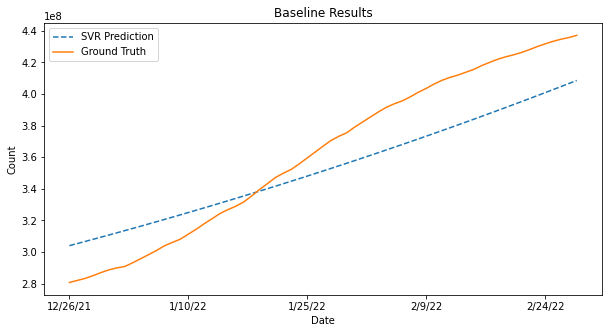

In [18]:
svr_result_df = pd.DataFrame({d:[c] for d,c in zip(dates_format_1[split:], svr_result)}).T

fig_3 = plt.figure(figsize=(10, 5))

plt.xticks(ticks=range(0, len(dates_format_1[split:]), 15), labels=dates_format_1[split:][::15])
plt.plot(svr_result_df, '--', label='SVR Prediction')
plt.plot(aligned_oneyear_global_confirmed_df.loc[aligned_oneyear_global_confirmed_df['Daily_Global_Confirmed'] >= y[split]], label='Ground Truth')

plt.title('Baseline Results')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')

plt.show()


### RNN


In [19]:
import torch


More Feature Engineerings.
- features from date.


In [20]:
rnn_features_df = baseline_global_confirmed_df.copy()
rnn_features_df = rnn_features_df.drop(columns=['Day_From_Start'])

def split_date(date_list):
    d, m, y = [], [], []
    for date in date_list:
        temp = date.split('/')
        m.append(temp[0])
        d.append(temp[1])
        y.append(temp[2])
    return m, d, y

rnn_features_df['Month'], rnn_features_df['Day'], rnn_features_df['Year'] = split_date(dates_format_1)

rnn_features_df.head(5)


,Daily_Global_Confirmed,Month,Day,Year
3/1/21,114872329,3,1,21
3/2/21,115188426,3,2,21
3/3/21,115632421,3,3,21
3/4/21,116090689,3,4,21
3/5/21,116539723,3,5,21


- OneHot encode month and day.

In [21]:
def onehot_encode_pd(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    return pd.concat([df, dummies], axis=1)

rnn_features_df = onehot_encode_pd(rnn_features_df, ['Month','Day'])

rnn_features_df.head(5)


,Daily_Global_Confirmed,Month,Day,Year,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,...,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9
3/1/21,114872329,3,1,21,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/2/21,115188426,3,2,21,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3/3/21,115632421,3,3,21,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3/4/21,116090689,3,4,21,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3/5/21,116539723,3,5,21,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


- Capture cyclic time feautres (sine and cosine waves) and append deaths and vaccinations.

In [22]:
rnn_features_df[['Month', 'Day']] = rnn_features_df[['Month', 'Day']].apply(pd.to_numeric)

def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda _: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda _: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs)

rnn_features_df = generate_cyclical_features(rnn_features_df, 'Month', 12, 1)
rnn_features_df = generate_cyclical_features(rnn_features_df, 'Day', 31, 1)

rnn_features_df['Deaths'] = aligned_oneyear_global_deaths_df['Daily_Global_Deaths']
rnn_features_df['Vaccinations'] = aligned_oneyear_global_vaccines_df['Daily_Global_Vaccinations']

rnn_features_df = rnn_features_df.drop(columns=['Month', 'Day', 'Year'])

rnn_features_df.head(5)


,Daily_Global_Confirmed,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,...,Day_6,Day_7,Day_8,Day_9,sin_Month,cos_Month,sin_Day,cos_Day,Deaths,Vaccinations
3/1/21,114872329,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.866025,0.5,0.000000,1.000000,2617581,262816442.0
3/2/21,115188426,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.866025,0.5,0.201299,0.979530,2628007,268933995.0
3/3/21,115632421,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.866025,0.5,0.394356,0.918958,2639771,276039548.0
3/4/21,116090689,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.866025,0.5,0.571268,0.820763,2650177,284250492.0
3/5/21,116539723,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.866025,0.5,0.724793,0.688967,2660692,291988658.0


- Whether it is a holiday in some major countries or not.

In [23]:
import holidays

hd = [holidays.CN(), holidays.RU(), holidays.US(), holidays.UK(), holidays.FR(), holidays.DE(), holidays.IND(), holidays.JP(), holidays.KR()]
    
# rnn_features_df['Is_Holiday'] = [1 if any(i in j for j in hd) else 0 for i in dates_format_1]

# 

# rnn_features_df.loc[rnn_features_df['Is_Holiday']==1]


In [24]:
from sklearn.model_selection import train_test_split

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(rnn_features_df, 'Daily_Global_Confirmed', 0.15)

- Normalize features.

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

scaler = get_scaler('robust')

X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

- Build Dataset and DataLoader.

In [26]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 16

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)

val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)

test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)

# Mini-batch 
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)


- Build RNN Models:
1. Vanilla Recurrent Neural Network:
> David E. Rumelhart; James L. McClelland, ``Learning Internal Representations by Error Propagation," in Parallel Distributed Processing: Explorations in the Microstructure of Cognition: Foundations , MIT Press, 1987, pp.318-362. doi:10.5555/104279.104293.
    
2. Long Short-Term Memory:
> Hochreiter, Sepp & Schmidhuber, Jürgen. (1997). Long Short-term Memory. Neural computation. 9. 1735-80. doi:10.1162/neco.1997.9.8.1735. 

3. Gated Recurrent Unit:
> Cho, Kyunghyun & Merrienboer, Bart & Bahdanau, Dzmitry & Bengio, Y.. (2014). On the Properties of Neural Machine Translation: Encoder-Decoder Approaches. doi:10.3115/v1/W14-4012. 

In [27]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        
        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]
        out = self.fc(out)

        return out

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTM, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = out[:, -1, :]
        out = self.fc(out)

        return out

class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRU, self).__init__()

        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        out, _ = self.gru(x, h0.detach())
        out = out[:, -1, :]
        out = self.fc(out)

        return out

def get_model(model, model_params):
    models = {
        "rnn": RNN,
        "lstm": LSTM,
        "gru": GRU,
    }
    return models.get(model.lower())(**model_params)
    

- Prepare for training

In [28]:
device = 'cpu'

class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        self.model.train()

        yhat = self.model(x)

        loss = self.loss_fn(y, yhat)
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
            model_path = f'Models/{self.model}_{datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

            for epoch in range(1, n_epochs + 1):
                batch_losses = []
                for x_batch, y_batch in train_loader:
                    x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                    y_batch = y_batch.to(device)
                    loss = self.train_step(x_batch, y_batch)
                    batch_losses.append(loss)
                training_loss = np.mean(batch_losses)
                self.train_losses.append(training_loss)

                with torch.no_grad():
                    batch_val_losses = []
                    for x_val, y_val in val_loader:
                        x_val = x_val.view([batch_size, -1, n_features]).to(device)
                        y_val = y_val.to(device)
                        self.model.eval()
                        yhat = self.model(x_val)
                        val_loss = self.loss_fn(y_val, yhat).item()
                        batch_val_losses.append(val_loss)
                    validation_loss = np.mean(batch_val_losses)
                    self.val_losses.append(validation_loss)

                if (epoch <= 10) | (epoch % 50 == 0):
                    print(
                        f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                    )

            # torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()


- Train.

In [29]:
import torchinfo
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
batch_size = 16
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)
torchinfo.summary(model)


Layer (type:depth-idx)                   Param #
LSTM                                     --
├─LSTM: 1-1                              62,720
├─Linear: 1-2                            65
Total params: 62,785
Trainable params: 62,785
Non-trainable params: 0

[1/100] Training loss: 0.3307	 Validation loss: 1.5041
[2/100] Training loss: 0.3042	 Validation loss: 1.4757
[3/100] Training loss: 0.2833	 Validation loss: 1.4175
[4/100] Training loss: 0.2490	 Validation loss: 1.3106
[5/100] Training loss: 0.1925	 Validation loss: 1.1251
[6/100] Training loss: 0.1063	 Validation loss: 0.8472
[7/100] Training loss: 0.0317	 Validation loss: 0.5447
[8/100] Training loss: 0.0127	 Validation loss: 0.3693
[9/100] Training loss: 0.0106	 Validation loss: 0.3319
[10/100] Training loss: 0.0069	 Validation loss: 0.3203
[50/100] Training loss: 0.0025	 Validation loss: 0.2016
[100/100] Training loss: 0.0037	 Validation loss: 0.2097


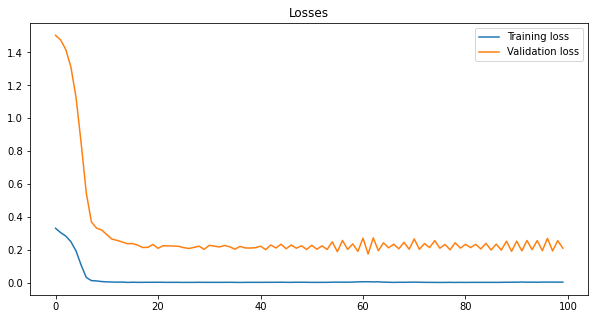

In [30]:
loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)

- Reverse Normalization to get predictions.

In [31]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    result_df = pd.DataFrame(data={"Truth": vals, "RNN": preds}, index=df_test.head(len(vals)).index)
    # result_df = result_df.sort_index()
    result_df = inverse_transform(scaler, result_df, [["Truth", "RNN"]])
    return result_df

result_df = format_predictions(predictions, values, X_test, scaler)
result_df['SVR'] = svr_result_df.iloc[-len(result_df.index):]

<AxesSubplot:>

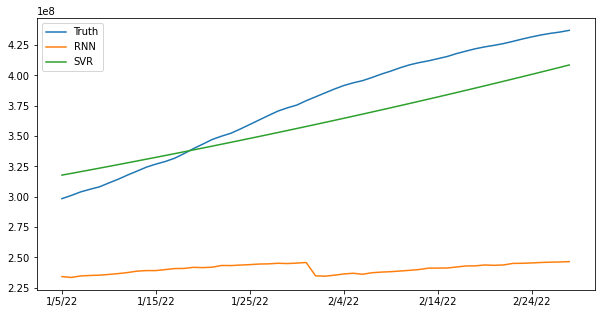

In [33]:
result_df.plot(figsize=(10, 5))